In [2]:
import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import tensorflow as tf

In [8]:
#setting figure size in the start using mpl
mpl.rcParams['figure.figsize'] = (12, 6)

In [10]:
zip_path = tf.keras.utils.get_file(
    origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname = 'jena_climate_2009_2016.csv.zip',
    extract = True
)

csv_path, _ = os.path.splitext(zip_path)

In [15]:
csv_path

'C:\\Users\\Hassan\\.keras\\datasets\\jena_climate_2009_2016.csv'

In [26]:
df_all = pd.read_csv(csv_path)
# df.to_csv('jena_climate_2009_2016.csv')
df_all.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

In [27]:
df_all.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [28]:
df_all.shape

(420551, 15)

In [29]:
df_all.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         420551.0     9.450147   8.423365   -23.01     3.36     9.42   
Tpot (K)         420551.0   283.492743   8.504471   250.60   277.43   283.47   
Tdew (degC)      420551.0     4.955854   6.730674   -25.01     0.24     5.22   
rh (%)           420551.0    76.008259  16.476175    12.95    65.21    79.30   
VPmax (mbar)     420551.0    13.576251   7.739020     0.95     7.78    11.82   
VPact (mbar)     420551.0     9.533756   4.184164     0.79     6.21     8.86   
VPdef (mbar)     420551.0     4.042412   4.896851     0.00     0.87     2.19   
sh (g/kg)        420551.0     6.022408   2.656139     0.50     3.92     5.59   
H2OC (mmol/mol)  420551.0     9.640223   4.235395     0.80     6.29     8.96   
rho (g/m**3)     420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79   
wv (m/s)         420551.0     1.702224  65.446714 -9999.00     0.99     1.76   
max. wv (m/s)    420551.0     3.056555  69.016932 -9999.00     1.76     2.96   
wd (deg)         420551.0   174.743738  86.681693     0.00   124.90   198.10   

                     75%      max  
p (mbar)          994.72  1015.35  
T (degC)           15.47    37.28  
Tpot (K)          289.53   311.34  
Tdew (degC)        10.07    23.11  
rh (%)             89.40   100.00  
VPmax (mbar)       17.60    63.77  
VPact (mbar)       12.35    28.32  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.80    18.13  
H2OC (mmol/mol)    12.49    28.82  
rho (g/m**3)     1242.77  1393.54  
wv (m/s)            2.86    28.49  
max. wv (m/s)       4.74    23.50  
wd (deg)          234.10   360.00

In [30]:
df = df_all[11::12]
df.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
11  01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
23  01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
35  01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62    92.7   
47  01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05    92.8   
59  01.01.2009 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   

    VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
11          3.12          2.90          0.21       1.81             2.91   
23          3.07          2.85          0.23       1.78             2.85   
35          2.93          2.71          0.21       1.69             2.72   
47          3.31          3.07          0.24       1.92             3.08   
59          3.60          3.30          0.30       2.05             3.29   

    rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
11       1312.25      0.25           0.63     190.3  
23       1313.61      0.10           0.38     240.0  
35       1317.71      0.05           0.50     146.0  
47       1311.65      0.72           1.25     213.9  
59       1307.76      1.45           3.00     292.6

In [31]:
df.shape

(35045, 15)

In [32]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [33]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
date_time

11       2009-01-01 02:00:00
23       2009-01-01 04:00:00
35       2009-01-01 06:00:00
47       2009-01-01 08:00:00
59       2009-01-01 10:00:00
                 ...        
420491   2016-12-31 14:10:00
420503   2016-12-31 16:10:00
420515   2016-12-31 18:10:00
420527   2016-12-31 20:10:00
420539   2016-12-31 22:10:00
Name: Date Time, Length: 35045, dtype: datetime64[ns]

In [34]:
df.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
11    996.62     -8.88    264.54        -9.77    93.2          3.12   
23    996.99     -9.05    264.34       -10.02    92.6          3.07   
35    997.71     -9.67    263.66       -10.62    92.7          2.93   
47    999.17     -8.10    265.12        -9.05    92.8          3.31   
59   1000.27     -7.04    266.10        -8.17    91.6          3.60   

    VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
11          2.90          0.21       1.81             2.91       1312.25   
23          2.85          0.23       1.78             2.85       1313.61   
35          2.71          0.21       1.69             2.72       1317.71   
47          3.07          0.24       1.92             3.08       1311.65   
59          3.30          0.30       2.05             3.29       1307.76   

    wv (m/s)  max. wv (m/s)  wd (deg)  
11      0.25           0.63     190.3  
23      0.10           0.38     240.0  
35      0.05           0.50     146.0  
47      0.72           1.25     213.9  
59      1.45           3.00     292.6

In [36]:
df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

array([<Axes: xlabel='Date Time'>, <Axes: xlabel='Date Time'>],
      dtype=object)

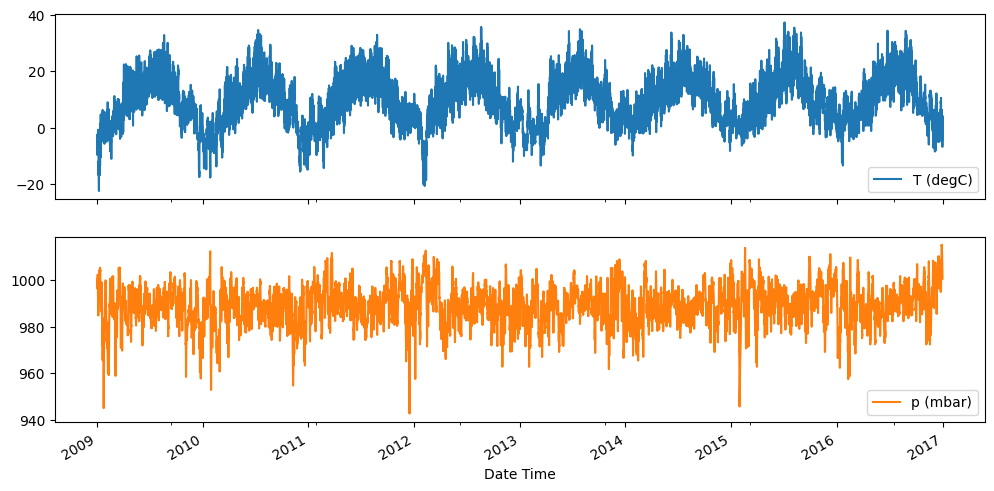

In [38]:
plot_cols = ['T (degC)', 'p (mbar)']
plot_features = df[plot_cols]
plot_features.index = date_time
plot_features.plot(subplots=True)

array([<Axes: xlabel='Date Time'>, <Axes: xlabel='Date Time'>],
      dtype=object)

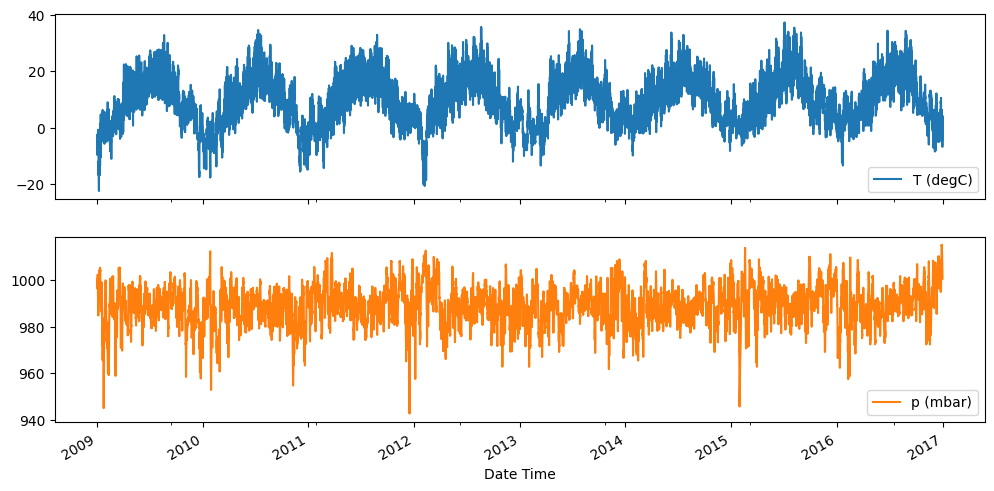

In [67]:
plot_cols = ['T (degC)', 'p (mbar)']
plot_features = df[plot_cols]#[:250]
plot_features.index = date_time#[:250]
plot_features.plot(subplots=True)

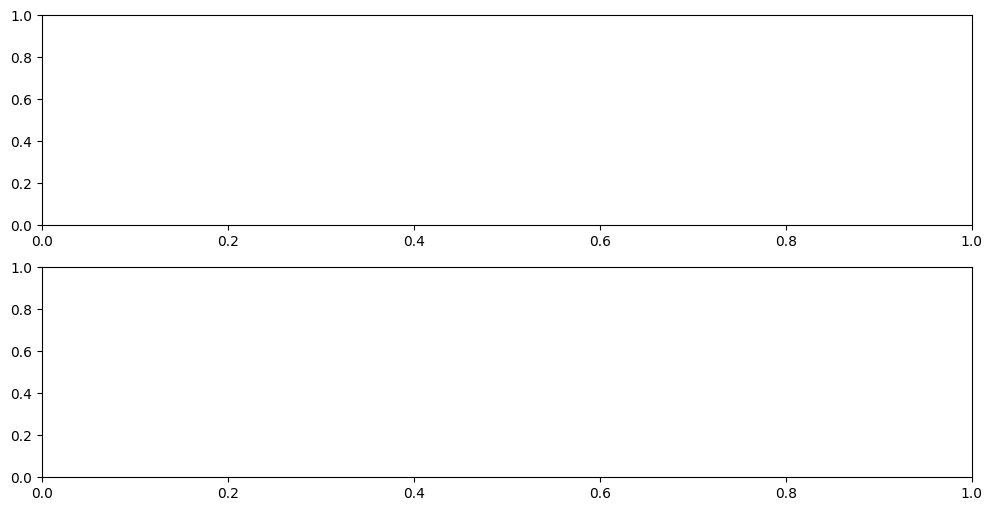

In [68]:
# make the same plots in plotly with two subplots
import plotly.express as px
plt.subplot(2,1,1)
fig = px.line(plot_features, x=plot_features.index, y=plot_cols[0])
fig.update_traces(line_color='red')
fig.show()

plt.subplot(2,1,2)
fig = px.line(plot_features, x=plot_features.index, y=plot_cols[1])
fig.update_traces(line_color='purple')
fig.show()



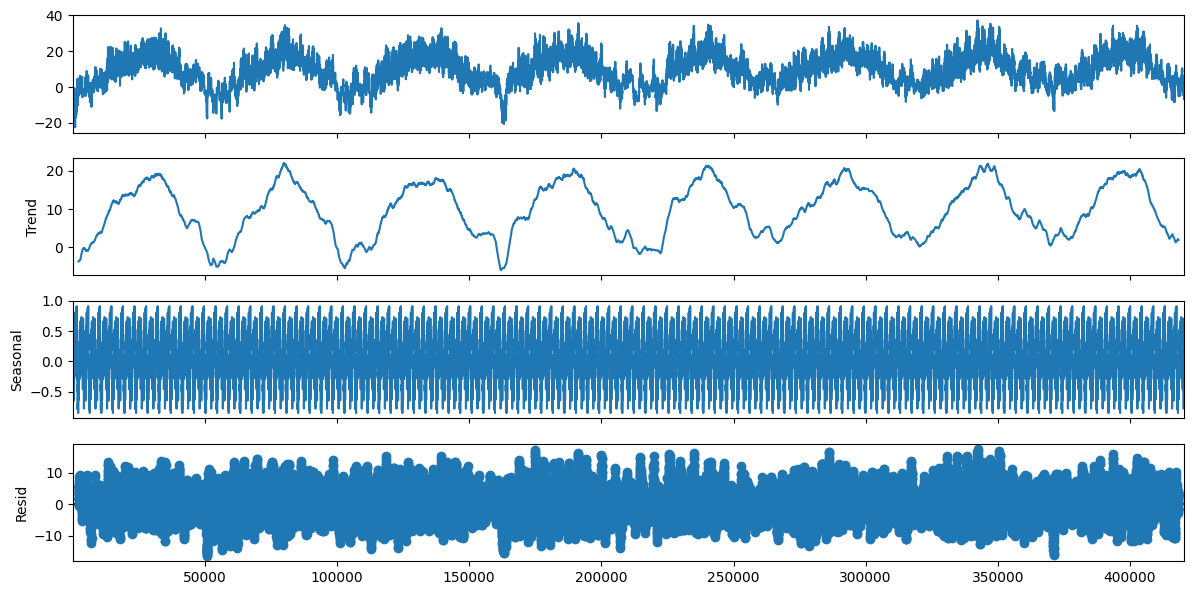

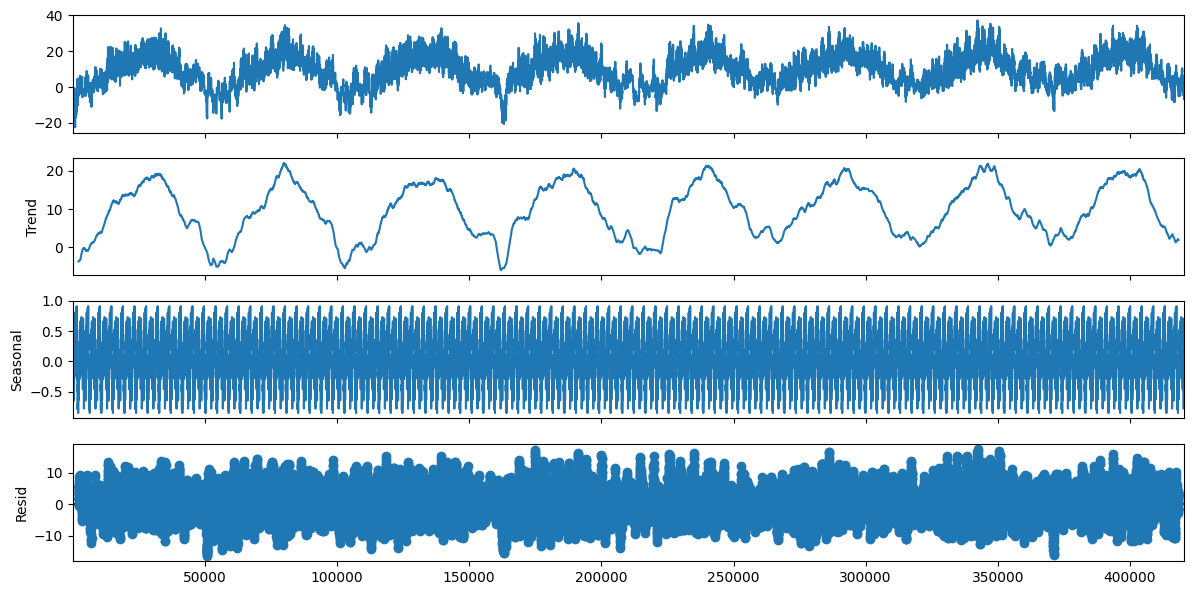

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

# seasoned = seasonal_decompose(df['T (degC)'], model='multiplicative')
seasoned = seasonal_decompose(df[['T (degC)']], model='additive', period=365)

seasoned.plot()

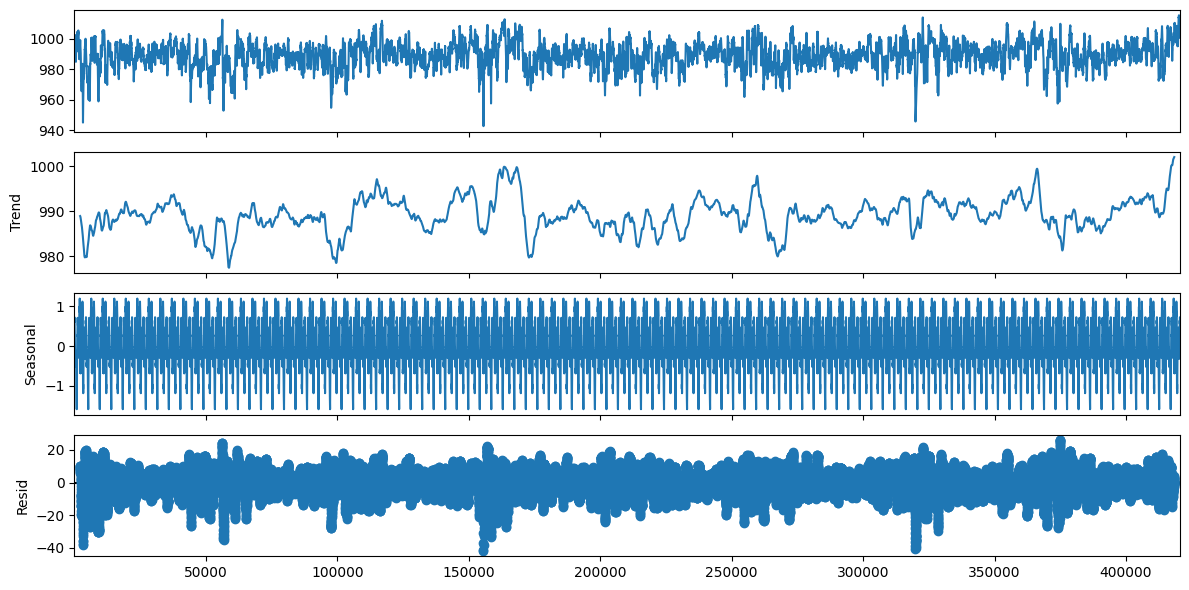

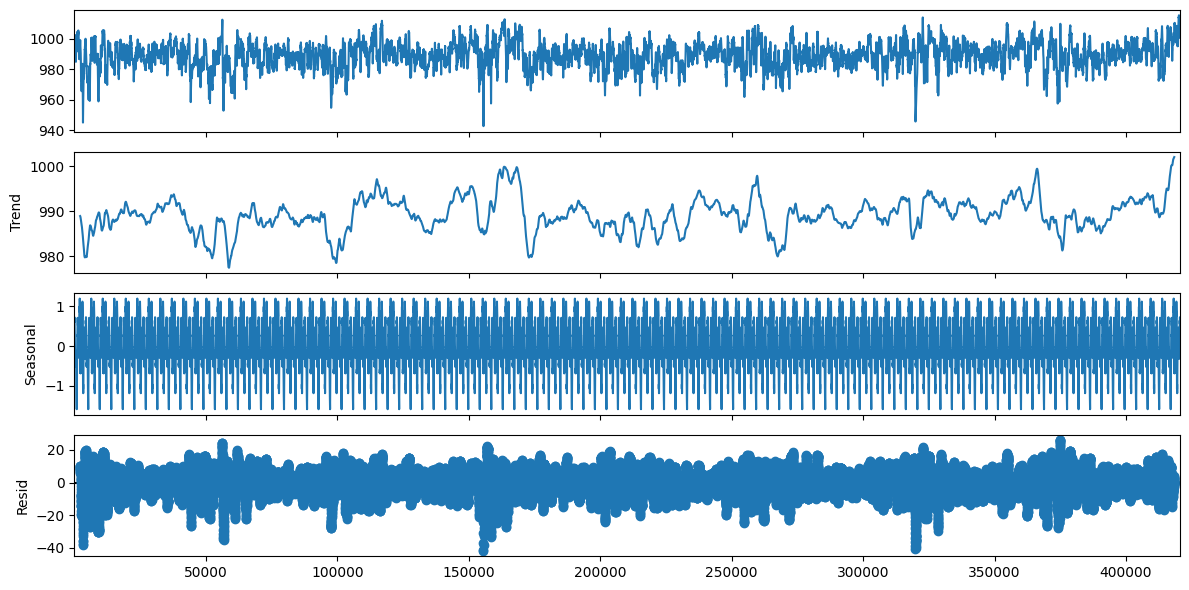

In [87]:
seasoned = seasonal_decompose(df[['p (mbar)']], model='additive', period=365)

seasoned.plot()

In [91]:
# how to check the negative values in df and remove these
df = df[df['wv (m/s)'] > 0]


In [92]:
df[df['max. wv (m/s)'] < 0]

Empty DataFrame
Columns: [p (mbar), T (degC), Tpot (K), Tdew (degC), rh (%), VPmax (mbar), VPact (mbar), VPdef (mbar), sh (g/kg), H2OC (mmol/mol), rho (g/m**3), wv (m/s), max. wv (m/s), wd (deg)]
Index: []

In [93]:
df.describe().T

count         mean        std      min        25%  \
p (mbar)         35006.0   989.208528   8.356782   942.65   984.2000   
T (degC)         35006.0     9.454731   8.423805   -22.50     3.3600   
Tpot (K)         35006.0   283.497684   8.504432   251.22   277.4525   
Tdew (degC)      35006.0     4.956689   6.728314   -24.55     0.2500   
rh (%)           35006.0    75.992748  16.483631    13.88    65.1325   
VPmax (mbar)     35006.0    13.580541   7.743607     0.99     7.7800   
VPact (mbar)     35006.0     9.533509   4.181242     0.83     6.2200   
VPdef (mbar)     35006.0     4.046975   4.904300     0.00     0.8700   
sh (g/kg)        35006.0     6.022268   2.654238     0.52     3.9200   
H2OC (mmol/mol)  35006.0     9.639989   4.232357     0.83     6.2900   
rho (g/m**3)     35006.0  1216.037726  39.968019  1102.46  1187.4700   
wv (m/s)         35006.0     2.131010   1.541509     0.01     1.0000   
max. wv (m/s)    35006.0     3.536553   2.342190     0.13     1.7800   
wd (deg)         35006.0   174.824626  86.570858     0.03   125.9000   

                      50%        75%      max  
p (mbar)          989.560   994.7200  1015.16  
T (degC)            9.430    15.4900    37.28  
Tpot (K)          283.480   289.5500   311.21  
Tdew (degC)         5.220    10.0800    22.19  
rh (%)             79.200    89.5000   100.00  
VPmax (mbar)       11.830    17.6200    63.77  
VPact (mbar)        8.860    12.3600    26.79  
VPdef (mbar)        2.180     5.3100    46.01  
sh (g/kg)           5.600     7.8075    17.13  
H2OC (mmol/mol)     8.970    12.4900    27.25  
rho (g/m**3)     1213.805  1242.7400  1391.41  
wv (m/s)            1.760     2.8500    13.50  
max. wv (m/s)       2.980     4.7400    23.50  
wd (deg)          198.200   233.6000   360.00

## Modeling

In [95]:
df.shape

(35006, 14)

In [100]:
# split the data into train, validation and split datasets
train_df = df[:int(len(df) * 0.7)]
val_df = df[int(len(df) * 0.7):int(len(df) * 0.9)]
test_df = df[int(len(df) * 0.9):]

train_df.shape, val_df.shape, test_df.shape


((24504, 14), (7001, 14), (3501, 14))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

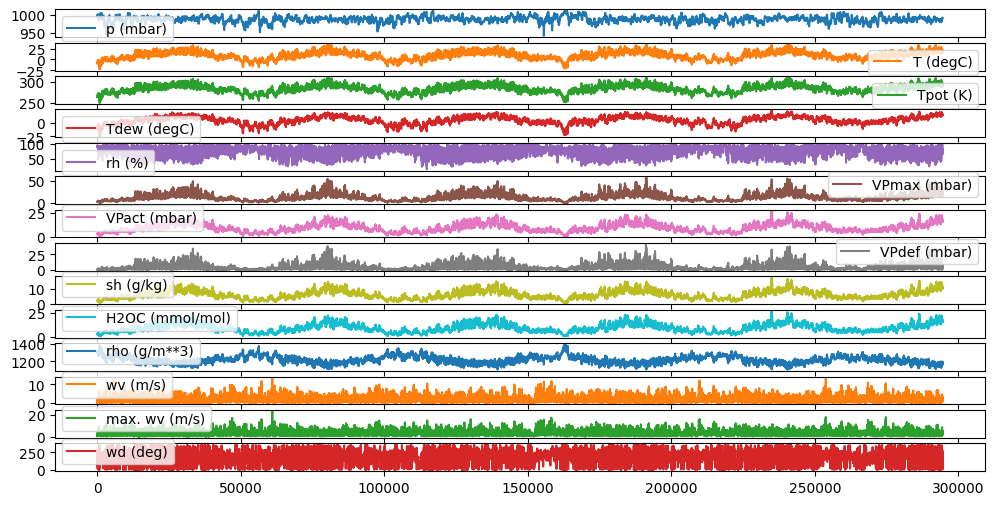

In [101]:
# plot the data
train_df.plot(subplots=True)

In [107]:
train_mean = train_df.mean()
train_std = train_df.std()

# lets normalize the training data
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

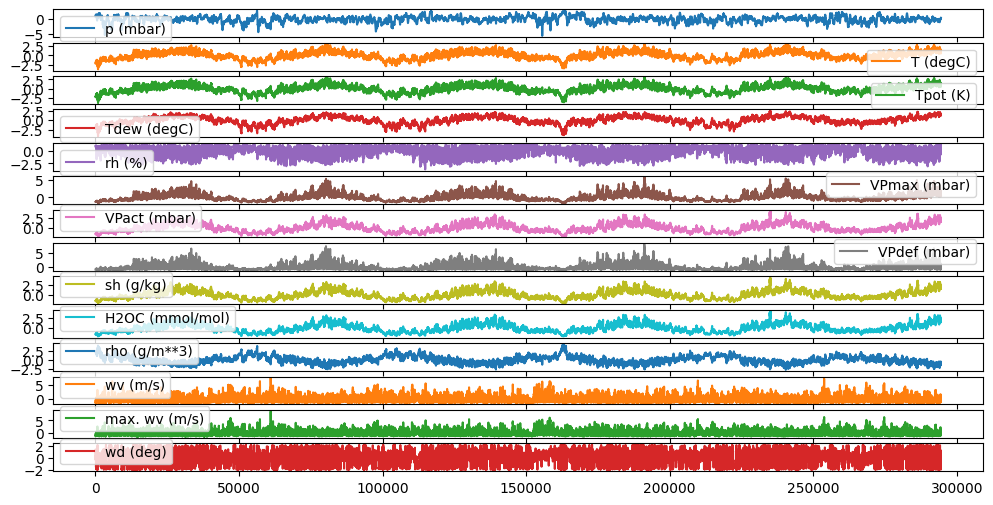

In [106]:
train_df.plot(subplots= True)

In [108]:
train_df

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)    rh (%)  VPmax (mbar)  \
11      0.961002 -2.079279 -2.139279    -2.061790  1.044961     -1.330713   
23      1.005622 -2.098920 -2.162203    -2.097647  1.008735     -1.337209   
35      1.092449 -2.170552 -2.240146    -2.183705  1.014772     -1.355398   
47      1.268515 -1.989161 -2.072799    -1.958521  1.020810     -1.306028   
59      1.401167 -1.866692 -1.960471    -1.832304  0.948358     -1.268350   
...          ...       ...       ...          ...       ...           ...   
294443  0.300152  1.279355  1.248912     1.658757  0.109120      1.343097   
294455  0.288093  1.491942  1.460960     1.536843 -0.614195      1.710778   
294467  0.352007  1.245850  1.211087     1.612860  0.097045      1.288529   
294479  0.368890  1.268957  1.232865     1.555488 -0.078048      1.326207   
294491  0.472600  0.914261  0.871809     1.338911  0.368740      0.789626   

        VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
11         -1.535666     -0.786487  -1.537550        -1.540395      2.327395   
23         -1.547552     -0.782339  -1.548785        -1.554485      2.360608   
35         -1.580832     -0.786487  -1.582491        -1.585014      2.460737   
47         -1.495254     -0.780265  -1.496354        -1.500473      2.312742   
59         -1.440578     -0.767821  -1.447667        -1.451158      2.217742   
...              ...           ...        ...              ...           ...   
294443      2.151346      0.264998   2.143897         2.139473     -1.177344   
294455      1.920759      1.055166   1.911700         1.906986     -1.347562   
294467      2.063390      0.256702   2.050269         2.047887     -1.132652   
294479      1.954040      0.412247   1.941661         1.939863     -1.142909   
294491      1.564182     -0.104162   1.548424         1.547688     -0.797344   

        wv (m/s)  max. wv (m/s)  wd (deg)  
11     -1.244461      -1.266962  0.194799  
23     -1.342348      -1.374809  0.762282  
35     -1.374977      -1.323043 -0.311026  
47     -0.937748      -0.999502  0.464268  
59     -0.461364      -0.244576  1.362878  
...          ...            ...       ...  
294443  0.184691       0.531921  1.032893  
294455  0.119433       0.963307  1.206449  
294467  0.804643       1.006446 -1.699134  
294479 -0.330848       0.169556 -1.893243  
294491 -0.396106      -0.425758  0.830791  

[24504 rows x 14 columns]